In [1]:
#1(a)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_excel('/Users/meviusz/UQ/sem2-23/DATA7703/ass1/Snakes.xlsx', 
                   sheet_name='Adult Tiger snakes')

rows_with_miss = df.index[df[['BODY MASS', 'SVL']].isnull().any(axis=1)]

df_dropped = df.drop(rows_with_miss)

X = df_dropped[['BODY MASS']]
Y = df_dropped['SVL']

model = LinearRegression()
model.fit(X, Y)
pred_values = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_

regression_equation = f'y = {slope:.4f} * x + {intercept:.4f}'
sse = ((Y - pred_values) ** 2).sum()

print("Linear Regression Equation:", regression_equation)
print(f"Sum of Squared Error (SSE):", "{:.4f}".format(sse))

Linear Regression Equation: y = 0.0587 * x + 63.9596
Sum of Squared Error (SSE): 29671.5213
Linear Regression Equation: y = 0.0587 * x + 63.9596
Sum of Squared Error (SSE): 29671.5213


In [2]:
#(b)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, Y)
pred_values_quad = model.predict(X_poly)

quad_coefficients = model.coef_
quad_intercept = model.intercept_

regression_equation_quad = (f'y = {quad_coefficients[2]} * x^2 + '
                            f'{quad_coefficients[1]:.4f} * '
                            f'x + {quad_intercept:.4f}')
sse_quad = ((Y - pred_values_quad) ** 2).sum()


print("Quadratic Regression Equation:", regression_equation_quad)
print("Sum of Squared Error (SSE):",  "{:.4f}".format(sse_quad))
print(f"The different between linear regression and quadratic "
      f"regression: {(sse - sse_quad):.4f}")

Quadratic Regression Equation: y = -3.191025057405761e-05 * x^2 + 0.0973 * x + 55.5842
Sum of Squared Error (SSE): 24729.1495
The different between linear regression and quadratic regression: 4942.3718
Quadratic Regression Equation: y = -3.191025057405761e-05 * x^2 + 0.0973 * x + 55.5842
Sum of Squared Error (SSE): 24729.1495
The different between linear regression and quadratic regression: 4942.3718


In [3]:
#(c)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['BODY MASS', 'SVL']] = (imputer.
                            fit_transform(df[['BODY MASS', 'SVL']]))

X_filled = df[['BODY MASS']]
Y_filled = df['SVL']

model = LinearRegression()

model.fit(X_filled, Y_filled)

slope_filled = model.coef_[0]
intercept_filled = model.intercept_

pred_values_filled = model.predict(X_filled)

regression_equation_filled = (f'y = {slope_filled:.4f} * x'
                              f' + {intercept_filled:.4f}')
sse_filled = ((Y_filled.values - pred_values_filled) ** 2).sum()

print("Linear Regression Equation:", regression_equation_filled)
print("Sum of Squared Error (SSE):",  "{:.4f}".format(sse_filled))


Linear Regression Equation: y = 0.0576 * x + 64.5587
Sum of Squared Error (SSE): 45468.9132
Linear Regression Equation: y = 0.0576 * x + 64.5587
Sum of Squared Error (SSE): 45468.9132


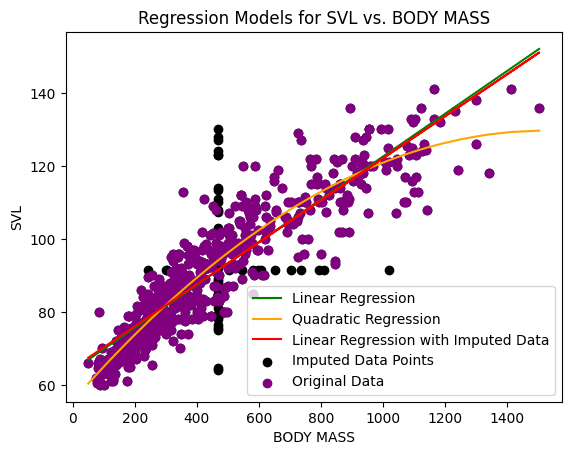

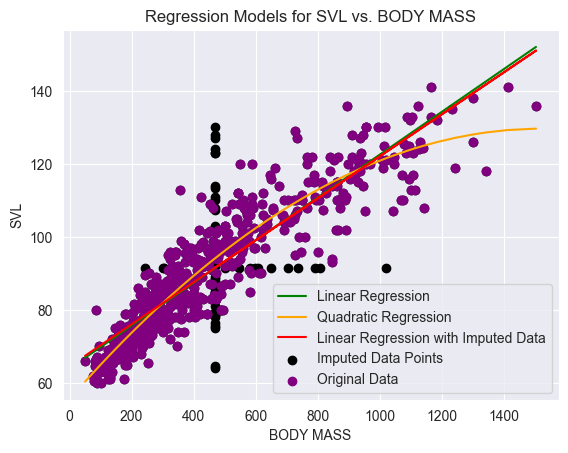

In [4]:
#(d)
import matplotlib.pyplot as plt

plt.plot(X, pred_values, label='Linear Regression', color='green')

plt.plot(X, pred_values_quad, label='Quadratic Regression', 
         color='orange')

plt.plot(X_filled, pred_values_filled, label='Linear Regression with '
                                             'Imputed Data', color='red')

plt.scatter(X_filled, Y_filled, label='Imputed Data Points', 
            color='black')
plt.scatter(X, Y, label='Original Data', color='purple')


plt.xlabel('BODY MASS')
plt.ylabel('SVL')
plt.title('Regression Models for SVL vs. BODY MASS')
plt.legend()

plt.show()


In [5]:
#(2)
import pandas as pd

file_path = '/Users/meviusz/UQ/sem2-23/DATA7703/ass1/reg2d.csv'
data = pd.read_csv(file_path, header=None)

x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values
y = data.iloc[:, 2].values

intercept = np.ones((len(data), 1))

x1_squared = x1 ** 2
x2_squared = x2 ** 2

x1x2 = x1 * x2

x_matrix = np.column_stack((intercept, x1, x2, 
                            x1_squared, x2_squared, x1x2))

theta_hat = (np.linalg.inv (x_matrix.T.dot (x_matrix)).dot 
             (x_matrix.T).dot (y))
print("The coefficients are:", theta_hat)

The coefficients are: [ 0.06041363 -0.25697386  0.05128251  1.14226452  0.8996328   0.13806308]
The coefficients are: [ 0.06041363 -0.25697386  0.05128251  1.14226452  0.8996328   0.13806308]


In [6]:
#(3)
#(a)
import pandas as pd
from sklearn.impute import SimpleImputer

file_path = '/Users/meviusz/UQ/sem2-23/DATA7703/ass1/penguins_size.csv'
data = pd.read_csv(file_path)

imputer = SimpleImputer(strategy='mean')
data[['body_mass_g', 'flipper_length_mm']] = (
    imputer.fit_transform(data[['body_mass_g', 'flipper_length_mm']]))

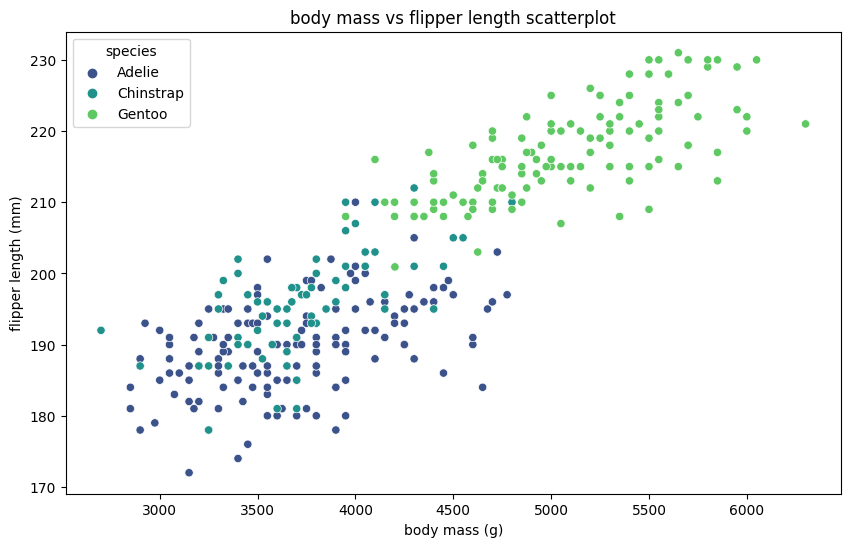

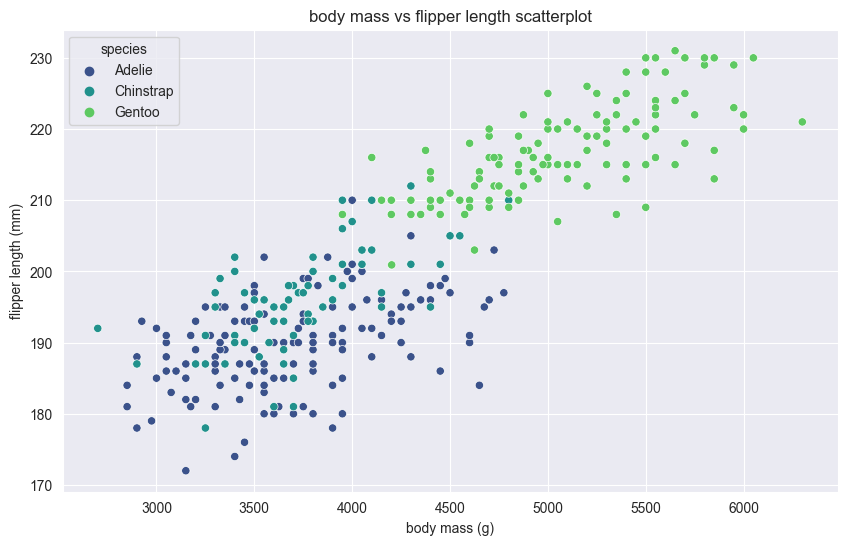

In [7]:
#(b)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='body_mass_g', y='flipper_length_mm', 
                hue='species', palette='viridis')

plt.legend(title='species')

plt.title('body mass vs flipper length scatterplot')
plt.xlabel('body mass (g)')
plt.ylabel('flipper length (mm)')

plt.show()

In [8]:
#(c)
from sklearn.model_selection import train_test_split

features = data[['body_mass_g', 'flipper_length_mm']]
target = data['species']

train_data, test_data, train_target, test_target = (
    train_test_split(features, target, test_size=0.3, random_state=50))

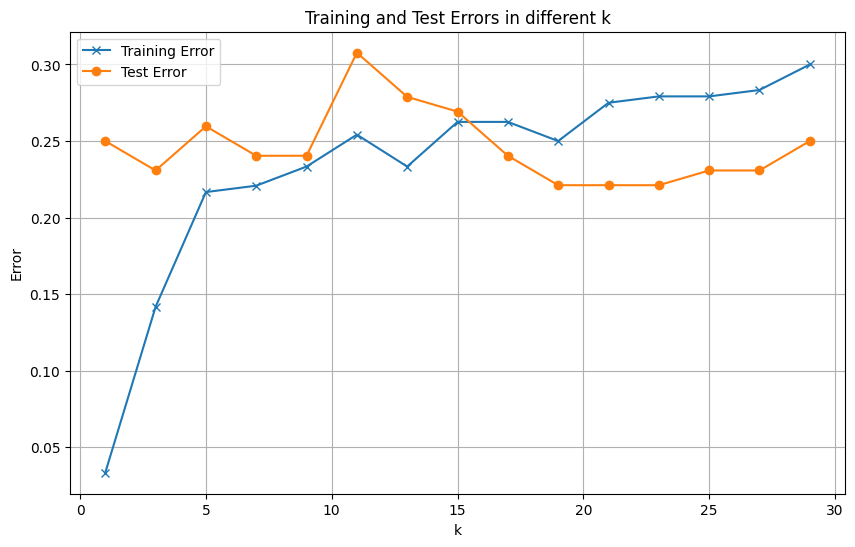

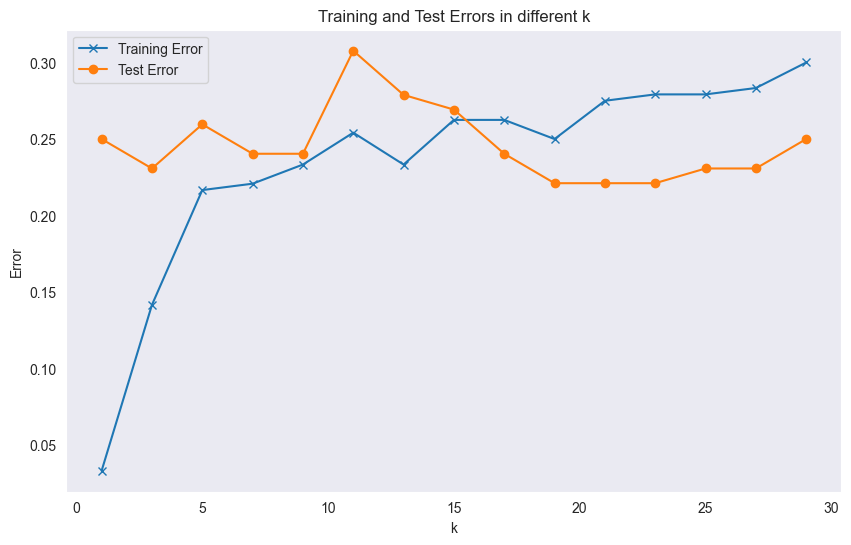

In [9]:
#(d)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
train_errors = []
test_errors = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_data, train_target)
    
    train_pred = knn_model.predict(train_data)
    test_pred = knn_model.predict(test_data)
    
    train_accuracy = accuracy_score(train_target, train_pred)
    test_accuracy = accuracy_score(test_target, test_pred)
    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, marker='x', label='Training Error')
plt.plot(k_values, test_errors, marker='o', label='Test Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Training and Test Errors in different k')
plt.legend()
plt.grid()
plt.show()

Train Error: 0.14166666666666672
Test Error: 0.1923076923076923


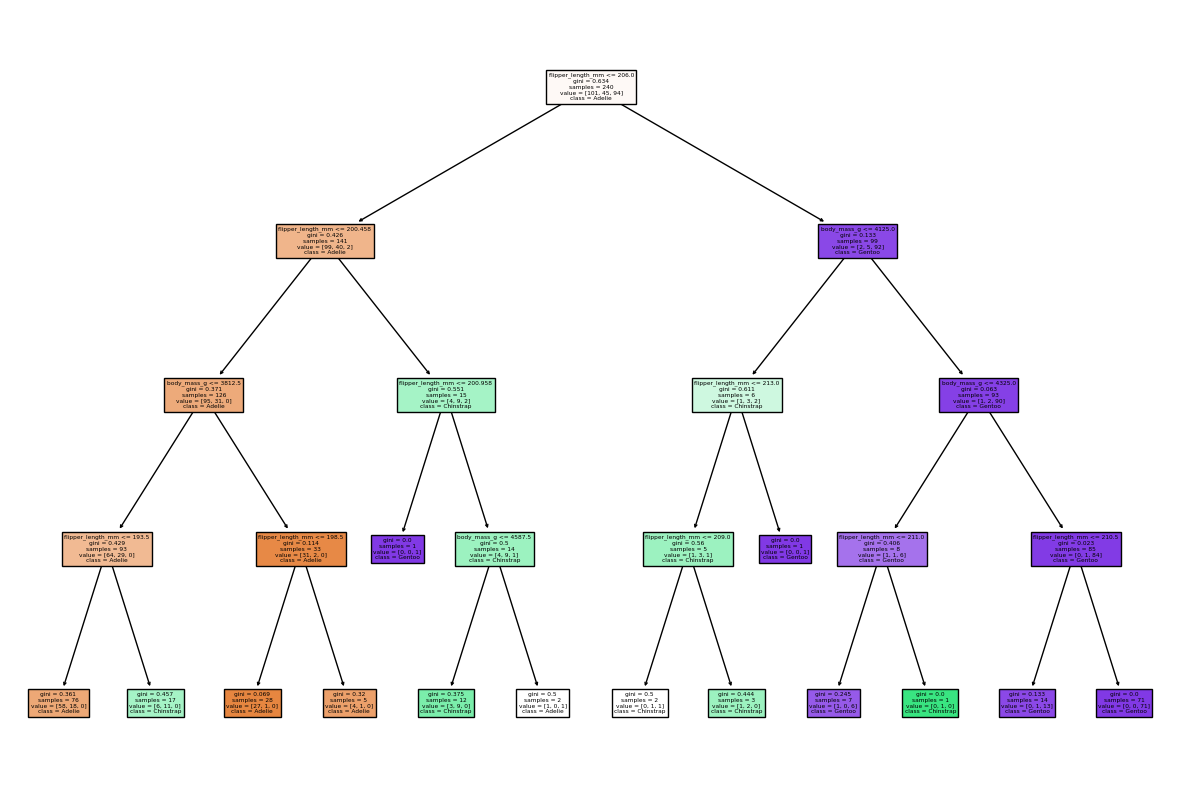

Train Error: 0.14166666666666672
Test Error: 0.1923076923076923


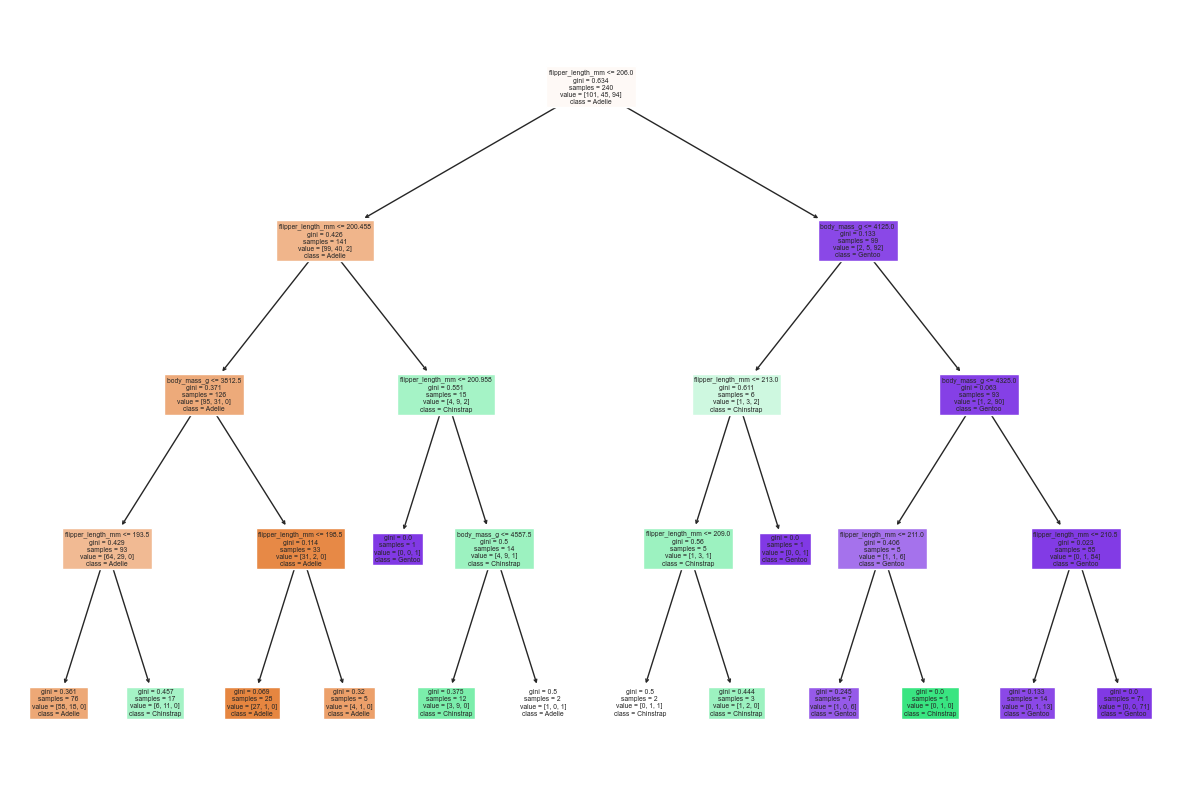

In [10]:
#(e)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

decision_tree = DecisionTreeClassifier(random_state=50, max_depth=4)
decision_tree.fit(train_data, train_target)

train_pred = decision_tree.predict(train_data)
test_pred = decision_tree.predict(test_data)

train_accuracy = accuracy_score(train_target, train_pred)
test_accuracy = accuracy_score(test_target, test_pred)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

print("Train Error:", train_error)
print("Test Error:", test_error)

plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=
['body_mass_g', 'flipper_length_mm'], 
          class_names=list(decision_tree.classes_), filled=True)
plt.show()
